# Inżynieria cech i wstępne modelowanie

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

## Wczytanie danych

Sczytujemy nazwy kolumn:

In [2]:
col_names = pd.read_csv("UCI HAR Dataset/features.txt", delim_whitespace=True, header=None)[1]

Do występujących kolumn o zduplikowanych nazwach dodajemy odpowiednią numerację.

In [3]:
for i in range(42):
    col_names[302+i] += ["--1","--2","--3"][(i)//14]
    col_names[381+i] += ["--1","--2","--3"][(i)//14]
    col_names[460+i] += ["--1","--2","--3"][(i)//14]

In [4]:
X_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None, names=col_names)

In [5]:
X_train 

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


## Inżynieria cech

Bogatsi o doświadczenia z dokonanego EDA, przechodzimy do inżynierii cech. Wcześniej udało nam się pokazać wysoką korelację między zmiennymi w domenie czasu, a częstotliwości. Z tego powodu już na samym początku przed zastosowaniem PCA chcieliśmy dokonać redukcji wymiarów tylko do domeny częstotliwości. Jednak zbadanie zachowania się metryki silhouette_score dawało lepsze rezultaty, gdy PCA było na całości zbioru.

W celu zredukcji zbyt dużej liczby cech zdecydowaliśmy się na wspomnianą wcześniej metodę poznaną na laboratoriach - PCA. Aby dostosować odpowiednią ilość komponentów, tworzymy wykres obazujący ilość wyjaśnianej wariancji.

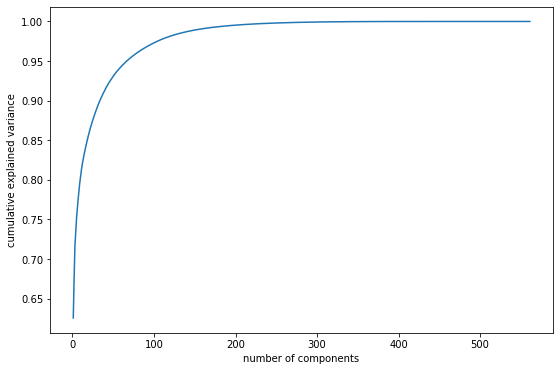

In [6]:
pca = PCA().fit(X_train)

plt.figure(figsize=(9,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [7]:
pca = PCA(n_components = 30)
data_30 = pca.fit_transform(X_train)

In [8]:
sum(pca.explained_variance_ratio_)

0.89061471196457

Już dla 30 komponentów zauważamy, że wyjaśnione zostało ponad 89% wariancji. Uznajemy, że jest to w naszym przypadku wynik wystarczający i to na taką liczbę komponentów się decydujemy. Później wywoływaliśmy kod dla innej liczby komponentów np. 10, 50, 100, 200 jednak nie miało to bardzo dużego wpływu na uzyskiwaną jakość metryk, a wyniki nie były zbyt interesujące.

## Wstępne modelowanie

Na tym etapie istotnym jest dla nas znalezenie odpowiedniej liczby klastrów. W tym celu będziemy badać zachowanie metryki silhouette_score oraz calinski_harabasz_score.

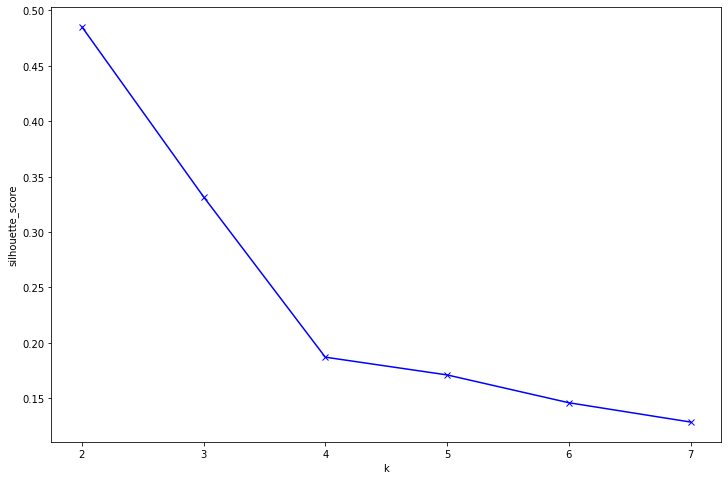

In [9]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

data = data_30

wyniki = []

for k in range(2,8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    score = silhouette_score(X_train, kmeans.predict(data))
    wyniki.append(score)

    

plt.figure(figsize=(12, 8))
plt.plot(range(2, 8), wyniki, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

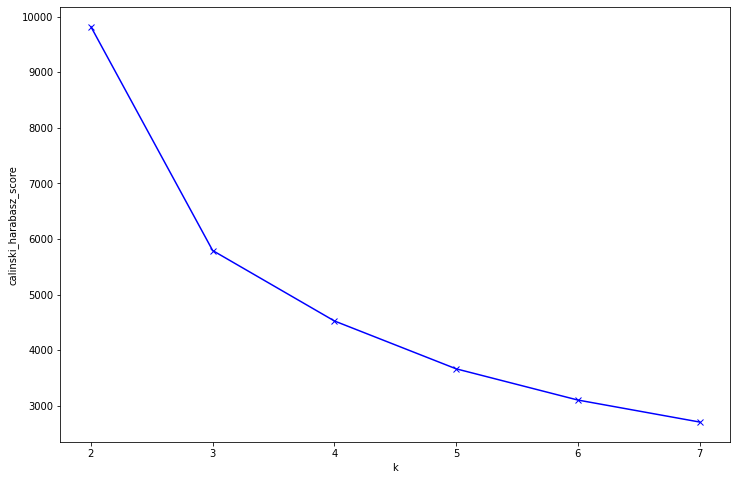

In [10]:
from sklearn.metrics import calinski_harabasz_score

data = data_30

wyniki = []

for k in range(2,8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    score = calinski_harabasz_score(X_train, kmeans.predict(data))
    wyniki.append(score)

    

plt.figure(figsize=(12, 8))
plt.plot(range(2, 8), wyniki, 'bx-')
plt.xlabel('k')
plt.ylabel('calinski_harabasz_score')
plt.show()

Jej zachowanie silhouette_score oraz calinski_harabasz_score jednoznacznie wskazywały, aby dokonać wyodrębnienie na 2 klastry. Istotnie dokonamy teraz tego podziału. Jesteśmy świadomi, że dane dotyczą rodzajów aktywności ludzi mierzonej przez smartfony. Narzuca się zatem wniosek, że być może bardzo łatwo jest odróźnić od siebie  aktywności, które polegają na przemieszczaniu się od tych statycznych.

Dokonajmy zatem tego podziału.

In [11]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=2, random_state=42)
clusterer.fit(data_30)

KMeans(n_clusters=2, random_state=42)

In [12]:
cluster_0 = X_train.loc[clusterer.labels_ == 0]
cluster_1 = X_train.loc[clusterer.labels_ == 1]

In [13]:
len(cluster_0)

3297

In [14]:
len(cluster_1)

4055

Otrzymaliśmy dwa klastry podobnej liczności. Jeśli hipoteza odnośnie zachodzącego podziału jest prawdziwa, to dobrym pomysłem może być zbadanie, czy da się dokonać dalszego podziału w obrębie każdego z klastrów.

Zdecydowaliśmy się na zastosowanie teraz PCA ponownie w obrębie tych klastrów, przypuszczając, że inne cechy mogą lepiej teraz wyjaśniać wariancje osobno dla aktywności statycznych i dynaminczych.

In [15]:
pca = PCA(n_components = 30, random_state=42)
cluster_0_30 = pca.fit_transform(cluster_0)
cluster_1_30 = pca.fit_transform(cluster_1)

Testujemy metryki.

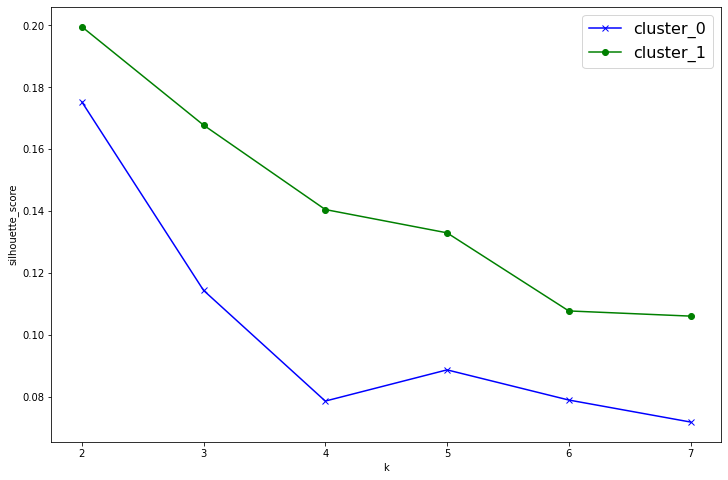

In [147]:
wyniki0 = []
wyniki1 = []

for k in range(2,8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_0_30)
    score = silhouette_score(cluster_0, kmeans.predict(cluster_0_30))
    wyniki0.append(score)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_1_30)
    score = silhouette_score(cluster_1, kmeans.predict(cluster_1_30))
    wyniki1.append(score)

    

plt.figure(figsize=(12, 8))
plt.plot(range(2, 8), wyniki0, 'bx-', label='cluster_0')
plt.plot(range(2, 8), wyniki1, 'go-', label='cluster_1')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.legend(loc='upper right', fontsize=16)
plt.show()

Miara silhouette_score nadal pokazuje, aby dokonać dalszego podziału na 2 klastry. Widzimy jednak, że dla klastra zerowego podział na 3 jest niemal tak samo premiowany jak podział na 2 dla klastra pierwszego. 

Zbadamy zatem zachowanie davies_bouldin_score. Ta metryka, oparta o średnie podobieństwo każdego z klastrów do pewnego, który najbardziej go przypomina. Podobieństwo jest zdefiniowane jako stosunek odległości wewnątrz klastra do odległości między klastrami - im mniejszy wynik tym lepiej.

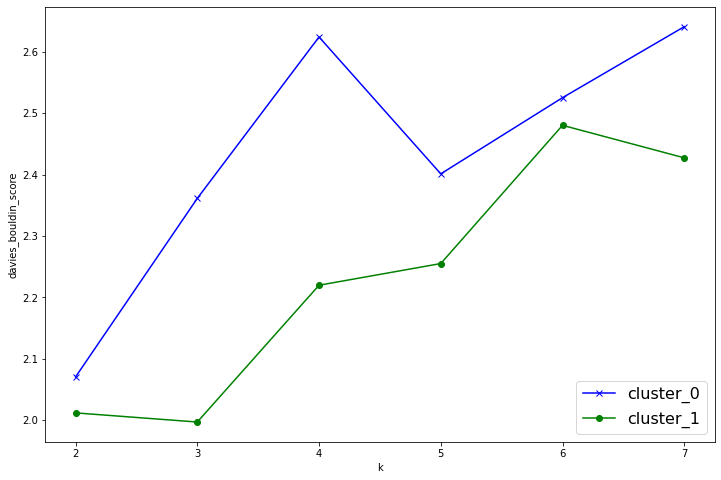

In [148]:
from sklearn.metrics import davies_bouldin_score


wyniki0 = []
wyniki1 = []

for k in range(2,8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_0_30)
    score = davies_bouldin_score(cluster_0, kmeans.predict(cluster_0_30))
    wyniki0.append(score)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_1_30)
    score = davies_bouldin_score(cluster_1, kmeans.predict(cluster_1_30))
    wyniki1.append(score)

    

plt.figure(figsize=(12, 8))
plt.plot(range(2, 8), wyniki0, 'bx-', label='cluster_0')
plt.plot(range(2, 8), wyniki1, 'go-', label='cluster_1')
plt.xlabel('k')
plt.ylabel('davies_bouldin_score')
plt.legend(loc='lower right', fontsize=16)
plt.show()

Z obawy na to, że miara silhouette_score może wykazywać pewną tendencyjność i jest jej ciężko wyodrębniać klastry dla tych danych więc dokonuje najmniej możliwie podziałów sugerujemy się metryką davies_bouldin_score i dokonujemy podziału na 2 i 3 w kolejnym kroku (odpowiednio klastra 0 i klastra 1).

In [68]:
clusterer = KMeans(n_clusters=2, random_state=42)
clusterer.fit(cluster_0_30)

KMeans(n_clusters=2, random_state=42)

In [69]:
# dodawanie odpowiedniej etykiety
cluster_00 = cluster_0.loc[clusterer.labels_ == 0]
cluster_00['Label'] = 0
cluster_01 = cluster_0.loc[clusterer.labels_ == 1]
cluster_01['Label'] = 1

In [70]:
clusterer = KMeans(n_clusters=3, random_state=42)
clusterer.fit(cluster_1_30)

KMeans(n_clusters=3, random_state=42)

In [71]:
# dodawanie odpowiedniej etykiety
cluster_10 = cluster_1.loc[clusterer.labels_ == 0]
cluster_10['Label'] = 2
cluster_11 = cluster_1.loc[clusterer.labels_ == 1]
cluster_11['Label'] = 3
cluster_12 = cluster_1.loc[clusterer.labels_ == 2]
cluster_12['Label'] = 4

Dokonaliśmy ostatecznie podziału na 5 klastrów. Było to jednak póki co wstępne modelowanie, a jedynym użytym algorytmem było KMeans, w finalnym modelowaniu będzie nam zależało na przetestowaniu również innych algorytmów do klasteryzacji i zbadanie, jak będą radziły sobie one na tym zbiorze.

## Wizualizajce przy pomocy T-SNE + na koniec zabawa z labelami oryginalnymi w celu weryfikacji słuszności naszych wyników

Stwórzmy więc wizualizację dokonanej klasteryzacji na 5 grup. Umieścimy również wizualizację T-SNE za pomocą oryginalnych etykiet, by porównać poprawność naszej ilości klastrów.

In [97]:
clusters5 = cluster_00.append(cluster_01).append(cluster_10).append(cluster_11).append(cluster_12)
clusters5 = clusters5.sort_index()

labels_TSNE = clusters5['Label']
clusters5 = clusters5.drop(columns='Label')

In [98]:
from sklearn.manifold import TSNE
X_pca = PCA(n_components=40).fit_transform(clusters5)
random_state = 1500100900
clusters_proj = TSNE(random_state=random_state).fit_transform(X_pca)

In [85]:
Y_train = pd.read_csv("UCI HAR Dataset/train/Y_train.txt", delim_whitespace=True, header=None)

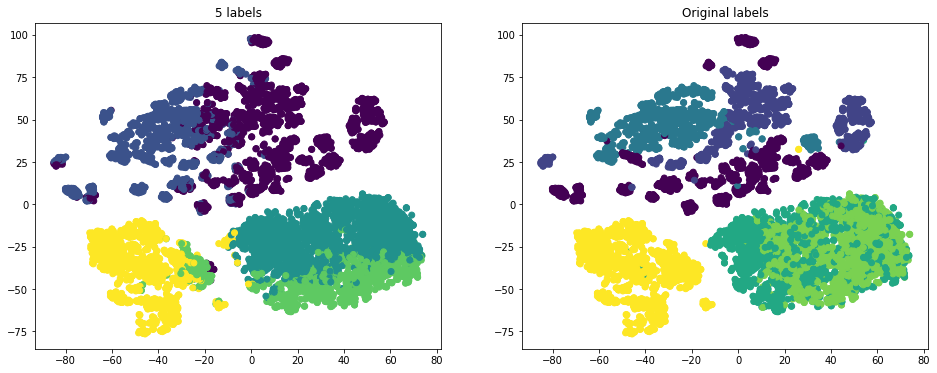

In [111]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(clusters_proj[:,0], clusters_proj[:,1], c=labels_TSNE)
plt.title('5 labels')

plt.subplot(1, 2, 2)
plt.scatter(clusters_proj[:,0], clusters_proj[:,1], c=Y_train)
plt.title('Original labels')

plt.show()

Z wykresów widzimy, że:
* żółty klaster, jest całkiem dobrze zdefiniowany
* w zbiorowisku kolorów zielonych, bardzo ciężko jest znaleźć wyróżniające cechy
* bazując również na wynikach z confusion matrix (patrz niżej), możemy wnioskować o podziale tego wykresu na dwie części, na górze mamy dynamiczne aktywności. Do pewnego scalenia się w jeden klaster doszło w obrębie WALKING i WALKING_UPSTAIRS. Co do aktywności statycznych: ogromne problemy sprawiło algorytmowi dokonanie podziału na aktywności SITTING i STANDING. Dosyć dobrze jest wyróżniane LAYING.

## Confusion matrix

In [140]:
label_list = np.zeros(shape=(5,6))
for cur_label, og_label in zip(labels_TSNE, Y_train[0]):
    label_list[cur_label][og_label - 1] += 1

In [141]:
label_df = pd.DataFrame(label_list)

In [145]:
label_df.columns = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

In [146]:
label_df

,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING,LAYING
0,853.0,914.0,259.0,1.0,0.0,11.0
1,373.0,159.0,727.0,0.0,0.0,0.0
2,0.0,0.0,0.0,914.0,935.0,0.0
3,0.0,0.0,0.0,321.0,439.0,157.0
4,0.0,0.0,0.0,50.0,0.0,1239.0


Głównie nasz początkowy podział na dwa klastry, czyli, na zbiorowiska klastrów o indeksach: 0, 1 i 2, 3, 4 spowodował podział na czynności dynamiczne i czynności statyczne. Potwierdza to więc naszą początkową intuicję o tych zbiorach. Następne klasteryzacje tych podgrup, nie przyniosły już tak idealnych wyników. Głównie, w zbiorowisku ruchomym, udało się oddzielić czynności WALKING_DOWNSTAIRS od WALKING + WALKING_UPSTAIRS. Natomiast w zbiorowisku statycznym, właściwie udało się tylko oddzielić prawie idealnie LAYING, ale SITTING i STANDING dalej pozostają wymieszane.

Na kolejnym etapie będziemy chcieli między innymi wypróbować różne metody klasteryzujące.